Original images


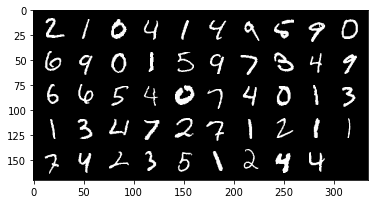

Autoencoder reconstruction:


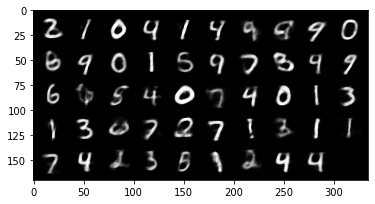

torch.Size([1024, 10])
tensor([[ 0.5259,  0.6314, -0.4269,  ...,  0.1287,  0.1992,  1.7681],
        [-0.7409, -1.3078, -0.2763,  ...,  1.5903,  0.3916, -1.6662],
        [ 0.1612, -0.9695, -0.3243,  ...,  0.2022, -0.3029,  0.5290],
        ...,
        [ 0.6551,  0.4269,  0.1810,  ..., -0.2623, -0.3308,  1.0073],
        [-0.6731,  1.0283,  1.6992,  ..., -0.5767, -0.0871, -0.5007],
        [ 0.4282,  1.5690, -1.0425,  ...,  0.7638, -0.2209, -1.4149]],
       device='cuda:0', grad_fn=<AddBackward0>)


In [2]:
# %%
import torch
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import torchvision.utils
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from main_clean import visualise_output, show_image
import numpy as np
from architectures_vae import VariationalEncoder, VariationalAutoencoder, Decoder



if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'

log_path = "vae_logs/"

batch_size = 128 * 2 * 2 * 2 # 1024
mnist_val = dataset.MNIST(
    "./", train=False,
    transform=transforms.ToTensor(),
    download=True)

val_loader = torch.utils.data.DataLoader(
    dataset=mnist_val,
    batch_size=batch_size,
    shuffle=False)

# Define your model
latent_dim = 10
model = VariationalAutoencoder(latent_dim).to(device)

# Load the saved model
model.load_state_dict(torch.load(f'{log_path}vae_model_latent_dims_{latent_dim}.pt'))
model.eval()

images, labels = next(iter(val_loader))
images = images.to(device)
output = model(images)

model.eval()
show_image(torchvision.utils.make_grid(images[1:50], 10, 5), f"{log_path}/latent_dim_{latent_dim}.png", save=False)

visualise_output(images, model, device, f"{log_path}/img_latent_dim_{latent_dim}.png", save=False)

# %%

encoder = model.encoder
# encoder = VariationalEncoder(latent_dim).to(device)
# encoder.load_state_dict(torch.load(f'{log_path}/model_latent_dims_{latent_dim}.pt'))
encoder.eval()
# Obtain the hidden representation
hidden_representations = encoder(images)
print(hidden_representations.shape)
print(hidden_representations)




In [3]:
import matplotlib.pyplot as plt

# Create a list of 2D hidden representation
hidden_representations = hidden_representations.cpu().detach().numpy()
labels = labels.cpu().detach().numpy().tolist()

# print(hidden_representations.shape)
# print(labels)


In [4]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(init='random', n_components=2, random_state=0, learning_rate=200) # enter init and lr to avoid warnings
hidden_representations_2d = tsne.fit_transform(hidden_representations)


tsne = TSNE(init='random', n_components=2, random_state=0, learning_rate=200)
hidden_representations_2d = tsne.fit_transform(hidden_representations)

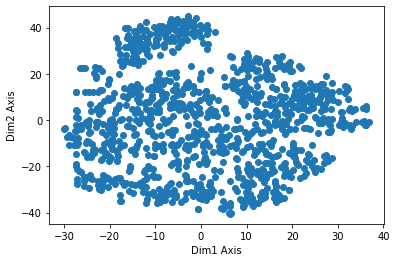

In [5]:
import matplotlib.pyplot as plt

# Plot the points using scatter plot
plt.scatter(*zip(*hidden_representations_2d))

# Label the axes
plt.xlabel('Dim1 Axis')
plt.ylabel('Dim2 Axis')

# Show the plot
plt.show()

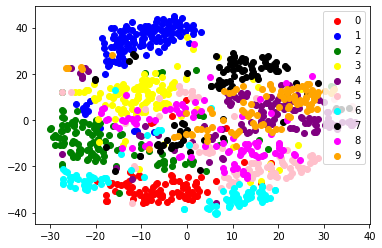

In [6]:
# Define colors for each label
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'cyan', 'black', 'magenta', 'orange']

# Plot the data points with different colors based on their labels
fig, ax = plt.subplots()
for label in np.unique(labels):
    mask = labels == label
    ax.scatter(hidden_representations_2d[mask, 0], hidden_representations_2d[mask, 1], c=colors[int(label)], label=str(label))

# Add a legend
ax.legend()

# Show the plot
plt.show()